<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem1/blob/main/K-Means%20and%20Spectral%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline
import random
import sys
inFile = sys.argv[1]
#outFile = sys.argv[2]

In [ ]:
data = pd.read_csv(inFile, sep='\t', header=None)
ground_truth = data.iloc[:,2]
data = data.iloc[:, [0,1]]

In [ ]:
data_list = np.array(data)

In [ ]:
def overall_accuracy(df_confusion):
  sum_diag = 0
  for i in range(len(df_confusion)):
    sum_diag = df_confusion[i][i] + sum_diag
  overall_acc = sum_diag/ data.shape[0]
  print('Accuracy : ', overall_acc)

In [ ]:
random.seed(42)
def init_centroids(listt):
  initial_centroids = []
  for i in random.sample(range(0, len(listt)), 2):
    initial_centroids.append(listt[i])
  initial_centroids = np.array(initial_centroids)
  #print(initial_centroids)

  return initial_centroids

In [ ]:
def K_means(listt, centroids):
  assigned_cluster = []
  for i in range(len(listt)):
    dist1 = (np.sqrt(np.sum((listt[i] - centroids[0])**2)))**2
    #print(dist1)
    dist2 = (np.sqrt(np.sum((listt[i] - centroids[1])**2)))**2
    #print(dist2)
    if dist1 < dist2:
      assigned_cluster.append(1)
    else:
      assigned_cluster.append(2)

  return assigned_cluster

In [ ]:
def update_centroids(listt, predicted_cluster):
  initial_centroids = init_centroids(listt)
  new_centroids = []
  new_data = pd.concat([pd.DataFrame(listt), pd.DataFrame(predicted_cluster, columns=['cluster'])], axis=1)
  #print(new_data)
  for c in set(new_data['cluster']):
    cluster_data = new_data.loc[new_data['cluster'] == c][new_data.columns[:-1]]
    #print(cluster_data)
    cluster_mean = cluster_data.mean(axis = 0)
    #print(cluster_mean)
    new_centroids.append(cluster_mean)

  return new_centroids


In [ ]:
def pred_k_means(listt):
  initial_centroids = init_centroids(listt)
  predicted_cluster = K_means(listt, initial_centroids)
  for i in range(35):
    new_centroids = update_centroids(listt, predicted_cluster)
    predicted_cluster = K_means(listt, new_centroids)
  return new_centroids, predicted_cluster

In [ ]:
new_centroids, predicted_cluster = pred_k_means(data_list)

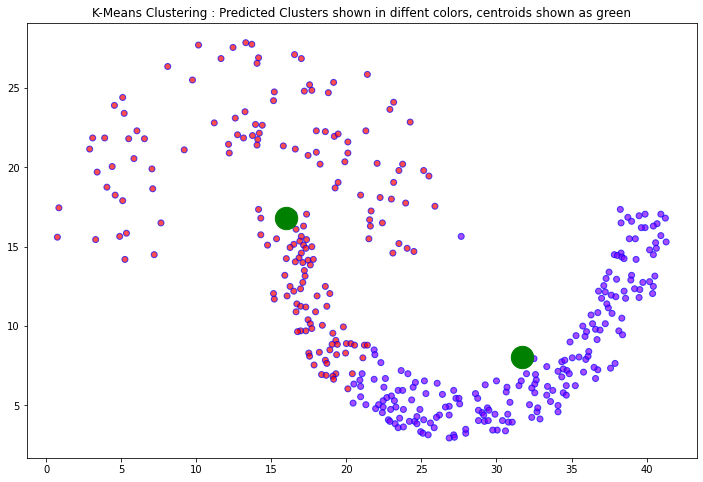

In [ ]:
plt.figure(figsize=(12,8))
plt.title('K-Means Clustering : Predicted Clusters shown in diffent colors, centroids shown as green')
plt.scatter(data_list[:,0], data_list[:,1], c=predicted_cluster, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.scatter(np.array(new_centroids)[:, 0], np.array(new_centroids)[:, 1], c='g', s = 500);

In [ ]:
print('K-Means Clustering')
df_confusion_k_means = confusion_matrix(ground_truth, predicted_cluster) 
overall_accuracy(df_confusion_k_means)

K-Means Clustering
Accuracy :  0.7855227882037533


Spectral Clustering

In [ ]:
def calc_matrices(data_list):

  W = np.empty((len(data_list), len(data_list)), dtype = 'float')

  for i in range(len(data_list)):
    for j in range(len(data_list)):
      W[i, j] = np.exp(-(np.sqrt(np.sum((data_list[i] - data_list[j])**2)))**2 / 2)
      if i == j:
        W[i, j] = 0

  D = np.diag(W.sum(axis = 1))

  L = D - W

  e, v = np.linalg.eig(L)

  index_sorted_eig = np.argsort(e)[:2]
  H = v[:,index_sorted_eig]

  return H

In [ ]:
H = calc_matrices(data_list)

In [ ]:
new_centroids_spc, predicted_cluster_spc = pred_k_means(H)

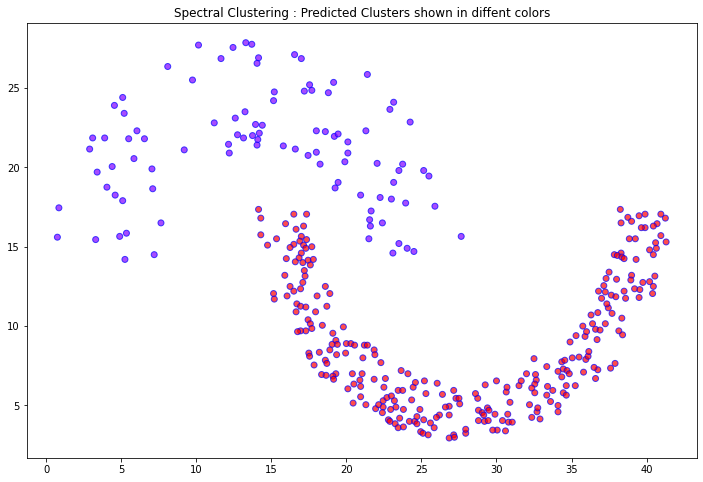

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Spectral Clustering : Predicted Clusters shown in diffent colors')
plt.scatter(data_list[:,0], data_list[:,1], c=predicted_cluster_spc, cmap='rainbow', alpha=0.7, edgecolors='b');

In [ ]:
print('Spectral Clustering')
for i in range(len(predicted_cluster_spc)):
  if predicted_cluster_spc[i] == 1:
    predicted_cluster_spc[i] = 2
  else:
    predicted_cluster_spc[i] = 1
df_confusion_spc = confusion_matrix(ground_truth, predicted_cluster_spc) 
overall_accuracy(df_confusion_spc)

Spectral Clustering
Accuracy :  1.0


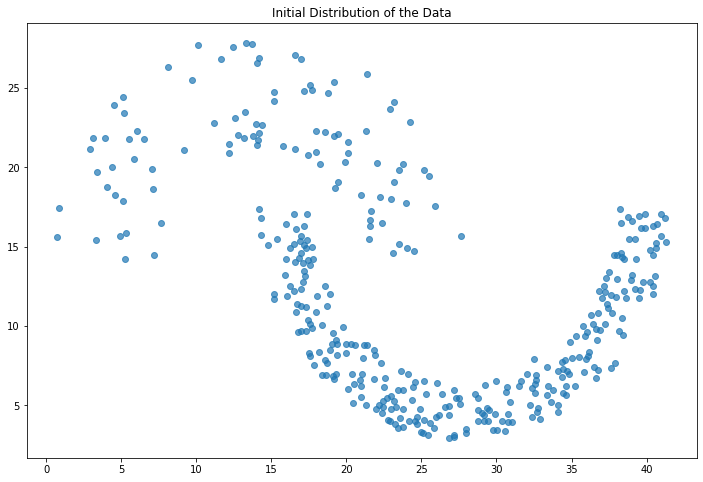

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Initial Distribution of the Data')
plt.scatter(data_list[:,0], data_list[:,1], alpha  = 0.7)